So far we have used flat ("uninformative") priors for all our parameters. For instance, in our model we parameterize

$$\tau_V = m_{\tau, 1} \log \left(\frac{M_*}{10^{10}M_\odot}\right) + m_{\tau, 2}\log {\rm SFR} + c_\tau$$

and use flat priors for $m_{\tau,1}, m_{\tau,2}, c_\tau$. However, I think this means that **we do not have a flat prior on $\tau_V$**. Does the fact that $M_*$ and ${\rm SFR}$ vary matter? 

In [1]:
import numpy as np
# -- plotting --
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [15]:
Nsample = 10000
m1 = np.random.uniform(-5., 5., size=Nsample)
m2 = np.random.uniform(-5., 5., size=Nsample)
c = np.random.uniform(0, 6, size=Nsample)

Text(0.5, 0, '$c_{\\tau}$')

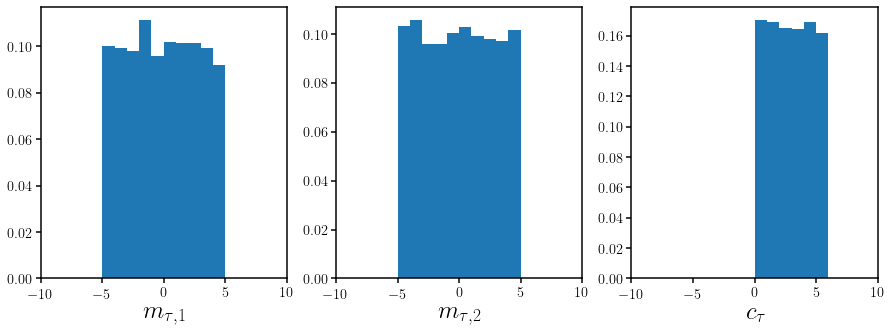

In [32]:
fig = plt.figure(figsize=(15,5))
sub = fig.add_subplot(131)
_ = sub.hist(m1, range=(-10, 10), bins=20, density=True)
sub.set_xlabel(r'$m_{\tau,1}$', fontsize=25)
sub.set_xlim(-10, 10)
sub = fig.add_subplot(132)
_ = sub.hist(m2, range=(-10, 10), bins=20, density=True)
sub.set_xlabel(r'$m_{\tau,2}$', fontsize=25)
sub.set_xlim(-10, 10)
sub = fig.add_subplot(133)
_ = sub.hist(c, range=(-10, 10), bins=20, density=True)
sub.set_xlim(-10, 10)
sub.set_xlabel(r'$c_{\tau}$', fontsize=25)

In [18]:
def tauv(ms, sfr): 
    return m1 * (ms - 10) + m2 * sfr + c

(-20.0, 20.0)

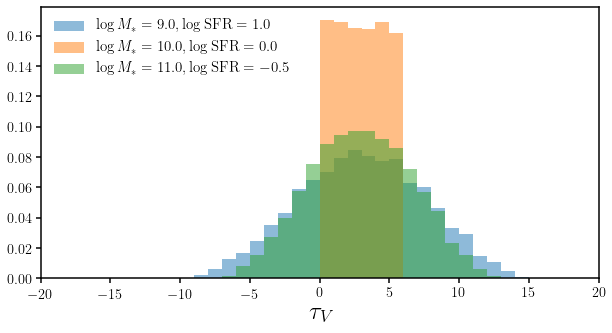

In [38]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
for _ms, _sfr in zip([9., 10., 11.], [1., 0., -0.5]):
    _ = sub.hist(tauv(_ms, _sfr), range=(-20, 20), bins=40, density=True, alpha=0.5, 
                 label=r'$\log M_*=%.1f, \log {\rm SFR} = %.1f$' % (_ms, _sfr))
sub.legend(loc='upper left', fontsize=15)
sub.set_xlabel(r'$\tau_V$', fontsize=25)
sub.set_xlim(-20, 20)